Importing all required Package

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# from google.colab import files

In [143]:
# uploaded = files.upload()

Uploading the file

In [144]:
train_data = pd.read_csv('titanic_train.csv')
test_data = pd.read_csv('titanic_test.csv')

In [145]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [146]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Checking the shape of dataset

Checking the null values columnswise

In [147]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Check the Test data for any null values 

In [148]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Checking the null percentage in training data

In [149]:
round((train_data.isnull().sum()/train_data.shape[0])*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

### Checking the null percentage in test data

In [150]:
round((test_data.isnull().sum()/test_data.shape[0])*100,2)

PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Cabin          78.23
Embarked        0.00
dtype: float64

###  As Cabin contains almost 77% Null in Training and 78% Null in Test dataset so let's drop it

In [151]:
train_data.drop('Cabin',axis=1,inplace=True)
test_data.drop('Cabin',axis=1,inplace=True)


### Rechecking the Null Percengate in Training and Testing dataset

In [152]:
round((train_data.isnull().sum()/train_data.shape[0])*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Embarked        0.22
dtype: float64

In [153]:
round((test_data.isnull().sum()/test_data.shape[0])*100,2)

PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Embarked        0.00
dtype: float64

### Embarked is categorical data so let's impute all NUll values with Value which have high count values

In [154]:
train_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [155]:
test_data.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [156]:
#'S' contains almost 644 so all 0.22% null values replace with 'S'
train_data['Embarked'] = train_data['Embarked'].fillna('S')
test_data['Embarked'] = test_data['Embarked'].fillna('S')


### Rechecking the Null Percentage in Training and Testing 

In [157]:
# Train
round((train_data.isnull().sum()/train_data.shape[0])*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Embarked        0.00
dtype: float64

In [158]:
# Test
round((test_data.isnull().sum()/test_data.shape[0])*100,2)

PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Embarked        0.00
dtype: float64

### Let's check unique count of some columns 

In [159]:
train_data.shape

(891, 11)

In [160]:
test_data.shape

(418, 10)

#### Checking on Training Data

In [161]:
len(train_data.PassengerId.unique())

891

In [162]:
len(train_data.Ticket.unique())

681

In [163]:
len(train_data.Name.unique())

891

#### Checking on Testing Data

In [164]:
len(test_data.PassengerId.unique())

418

In [165]:
len(test_data.Ticket.unique())

363

In [166]:
len(test_data.Name.unique())

418

### As based on above stats we can say that PassengerId , Name are contains unique values in each rows so they are not useful for prediction purpose similarly Ticket No. also not useful so let's drop this columns from Train & Test Dateset

In [167]:
train_data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
test_data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)


In [168]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [169]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


### Let's Map Sex with 0 and 1 in both Training and Test Set

In [170]:
train_data['Sex'] = train_data['Sex'].apply(lambda x:1 if x == 'male' else 0)
test_data['Sex'] = test_data['Sex'].apply(lambda x:1 if x == 'male' else 0)

In [171]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [172]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,Q
1,3,0,47.0,1,0,7.0000,S
2,2,1,62.0,0,0,9.6875,Q
3,3,1,27.0,0,0,8.6625,S
4,3,0,22.0,1,1,12.2875,S


In [173]:
train_data.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [174]:
test_data.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

### As we saw count of S > C > Q 
### so let's apply Label encoder on Embarked for imputing Age Purpose 

In [175]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
train_data.Embarked = le.fit_transform(train_data.Embarked)
test_data.Embarked = le.transform(test_data.Embarked)


In [176]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [177]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


### Let's split train_data into X_train , y_train

In [178]:
y_train = train_data.pop('Survived')
X_train = train_data

In [179]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [180]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


### Now all data in numeric format so we can able to apply Fancy imputer for imputing Age feature in Train ,Test dataset and Fare in Test dataset

In [181]:
## Let's impute Age with iterative imputer
from fancyimpute import IterativeImputer


In [182]:
## Store all columns name in vairable for both training and Testing 

df_train_columns = X_train.columns
df_test_columns = test_data.columns

In [183]:
interative = IterativeImputer()
train_iterative_result = interative.fit_transform(X_train)
train_iterative_result

array([[ 3.        ,  1.        , 22.        , ...,  0.        ,
         7.25      ,  2.        ],
       [ 1.        ,  0.        , 38.        , ...,  0.        ,
        71.2833    ,  0.        ],
       [ 3.        ,  0.        , 26.        , ...,  0.        ,
         7.925     ,  2.        ],
       ...,
       [ 3.        ,  0.        , 19.94492491, ...,  2.        ,
        23.45      ,  2.        ],
       [ 1.        ,  1.        , 26.        , ...,  0.        ,
        30.        ,  0.        ],
       [ 3.        ,  1.        , 32.        , ...,  0.        ,
         7.75      ,  1.        ]])

In [184]:
X_train = pd.DataFrame(train_iterative_result)
X_train.columns = df_train_columns
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0
1,1.0,0.0,38.0,1.0,0.0,71.2833,0.0
2,3.0,0.0,26.0,0.0,0.0,7.9250,2.0
3,1.0,0.0,35.0,1.0,0.0,53.1000,2.0
4,3.0,1.0,35.0,0.0,0.0,8.0500,2.0


### Let's apply on same on Test Dataset

In [185]:
test_iterative_result = interative.transform(test_data)
test_iterative_result

array([[ 3.        ,  1.        , 34.5       , ...,  0.        ,
         7.8292    ,  1.        ],
       [ 3.        ,  0.        , 47.        , ...,  0.        ,
         7.        ,  2.        ],
       [ 2.        ,  1.        , 62.        , ...,  0.        ,
         9.6875    ,  1.        ],
       ...,
       [ 3.        ,  1.        , 38.5       , ...,  0.        ,
         7.25      ,  2.        ],
       [ 3.        ,  1.        , 28.56483388, ...,  0.        ,
         8.05      ,  2.        ],
       [ 3.        ,  1.        , 21.92045439, ...,  1.        ,
        22.3583    ,  0.        ]])

In [186]:
X_test = pd.DataFrame(test_iterative_result)
X_test.columns = df_test_columns
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,1.0,34.5,0.0,0.0,7.8292,1.0
1,3.0,0.0,47.0,1.0,0.0,7.0000,2.0
2,2.0,1.0,62.0,0.0,0.0,9.6875,1.0
3,3.0,1.0,27.0,0.0,0.0,8.6625,2.0
4,3.0,0.0,22.0,1.0,1.0,12.2875,2.0


### Imputer return data in float format so convert it into original format 

In [187]:

### For Training dataset
int_columns = ['Pclass','Sex','Age','SibSp','Parch','Embarked']

for col in int_columns:
  X_train[col] = pd.to_numeric(X_train[col])
  X_train[col] = X_train[col].astype(int)

### For Test Dataset

for col in int_columns:
  X_test[col] = pd.to_numeric(X_test[col])
  X_test[col] = X_test[col].astype(int)


### Let's Check both data frame 


In [188]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22,1,0,7.2500,2
1,1,0,38,1,0,71.2833,0
2,3,0,26,0,0,7.9250,2
3,1,0,35,1,0,53.1000,2
4,3,1,35,0,0,8.0500,2


In [189]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34,0,0,7.8292,1
1,3,0,47,1,0,7.0000,2
2,2,1,62,0,0,9.6875,1
3,3,1,27,0,0,8.6625,2
4,3,0,22,1,1,12.2875,2


In [190]:
### Verifying Null Percentage in both Train and Test Set
round((X_train.isnull().sum()/X_train.shape[0])*100,2)

Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [191]:
round((X_test.isnull().sum()/X_test.shape[0])*100,2)

Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

# Outliers Treatment 

In [192]:
X_train.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.095398,0.523008,0.381594,32.204208,1.536476
std,0.836071,0.477990,13.658882,1.102743,0.806057,49.693429,0.791503
min,1.000000,0.000000,-7.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.910400,1.000000
50%,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,3.000000,1.000000,36.000000,1.000000,0.000000,31.000000,2.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [193]:
X_test.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,29.504785,0.447368,0.392344,35.524088,1.401914
std,0.841838,0.481622,13.113642,0.896760,0.981429,55.880272,0.854496
min,1.000000,0.000000,-7.000000,0.000000,0.000000,-7.469001,0.000000
25%,1.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200,2.000000
75%,3.000000,1.000000,36.000000,1.000000,0.000000,31.471875,2.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [194]:
### Here Age showing some outliers let's plot boxplot and check
#import seaborn as sns

### Checking for outlier in Age of Train and Test Dataset

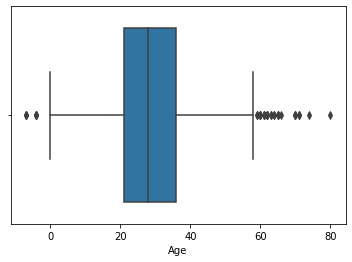

In [195]:
## Train 
sns.boxplot(X_train['Age'])


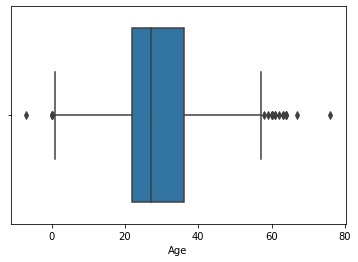

In [196]:
## Test
sns.boxplot(X_test['Age'])


#### After applying iterative Imputer we saw that for some peoples age is showing < 0 so insted of deleting we will impute them with mean value of age in Train and Test

In [197]:
int(round(X_train.Age.mean(),0))

29

In [198]:
X_train.loc[X_train.Age <= 0]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
78,2,1,0,0,2,29.0000,2
159,3,1,-4,8,2,69.5500,2
180,3,0,-7,8,2,69.5500,2
201,3,1,-4,8,2,69.5500,2
305,1,1,0,1,2,151.5500,2
324,3,1,-4,8,2,69.5500,2
469,3,0,0,2,1,19.2583,0
644,3,0,0,2,1,19.2583,0
755,2,1,0,1,1,14.5000,2
792,3,0,-7,8,2,69.5500,2


In [199]:
X_train.loc[(X_train.Age <= 0),'Age'] = X_train.loc[(X_train.Age <= 0),'Age'].replace(X_train.Age,int(round(X_train.Age.mean(),0)))

In [200]:
X_train.loc[X_train.Age <= 0]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [201]:
### Let's apply saame on Test dataset

X_test.loc[X_test.Age <= 0]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
188,3,0,-7,8,2,69.550,2
201,3,1,0,0,2,14.400,2
250,2,0,0,1,2,27.750,2
281,3,1,0,1,1,13.775,2
307,3,1,0,0,1,9.350,2
354,3,0,0,1,2,20.575,2


In [202]:
X_test.loc[(X_test.Age <= 0),'Age'] = X_test.loc[(X_test.Age <= 0),'Age'].replace(X_test.Age,int(round(X_train.Age.mean(),0)))

In [203]:
X_test.loc[X_test.Age <= 0]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [204]:
#X_train = X_train.loc[(X_train.Age > 0)]
#X_test = X_test.loc[(X_test.Age > 0)]

In [205]:
#X_train.loc[(X_train.Age <= 0)]

In [206]:
#X_test.loc[(X_test.Age <0)]

### Let's check outliers in Fare columns

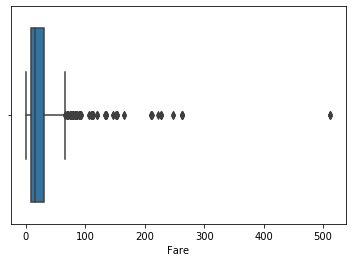

In [207]:
# Train 
sns.boxplot(X_train['Fare'])

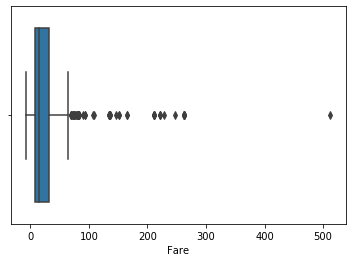

In [208]:
# Test
sns.boxplot(X_test['Fare'])

#### Not done any imputation on Fare as training data set contains 3 rows whose fare > 500 similarly test data set contains 1 rows for which fare > 500 so if drop any rows from test it will not match with output (418 Rows) and also if i replace the existing value with mean also not good approch so keep it as it is

In [209]:
## Checking in Train dataset
#X_train.loc[(X_train.Fare > 300)]

In [210]:
## Checking in the Test dataset
#X_test.loc[(X_test.Fare > 300)]

In [211]:
### Removing above outliers > 300 from Train and Test dataset

#X_train = X_train.loc[(X_train.Fare <= 300)]
#X_test = X_test.loc[(X_test.Fare <= 300)]


In [212]:
#X_train.loc[(X_train.Fare > 300)]

In [213]:
#X_test.loc[(X_test.Fare > 300)]

## Null value imputation Completed and Outlier Treatment Completed so next for model building we need to convert all categorical variables into 0's & 1's

In [214]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass      891 non-null int32
Sex         891 non-null int32
Age         891 non-null int32
SibSp       891 non-null int32
Parch       891 non-null int32
Fare        891 non-null float64
Embarked    891 non-null int32
dtypes: float64(1), int32(6)
memory usage: 27.9 KB


In [215]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int32
Sex         418 non-null int32
Age         418 non-null int32
SibSp       418 non-null int32
Parch       418 non-null int32
Fare        418 non-null float64
Embarked    418 non-null int32
dtypes: float64(1), int32(6)
memory usage: 13.1 KB


In [216]:
X_train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [217]:
X_test.Pclass.value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [218]:
X_train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [219]:
X_test.SibSp.value_counts()

0    283
1    110
2     14
4      4
3      4
8      2
5      1
Name: SibSp, dtype: int64

In [220]:
X_train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [221]:
X_test.Parch.value_counts()

0    324
1     52
2     33
3      3
9      2
4      2
6      1
5      1
Name: Parch, dtype: int64

In [222]:
X_train.Embarked.value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [223]:
X_test.Embarked.value_counts()

2    270
0    102
1     46
Name: Embarked, dtype: int64

In [224]:
## As here we can see that Pclass , SibSp , Parch , Embarked are Categorical so first convert then into String

cat_col = ['Pclass','SibSp','Parch','Embarked']

for cols in cat_col:
  X_train[cols] = X_train[cols].astype(str)
  X_test[cols] = X_test[cols].astype(str)


In [225]:
### Check the datatype of both Train and Test

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass      891 non-null object
Sex         891 non-null int32
Age         891 non-null int32
SibSp       891 non-null object
Parch       891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(1), int32(2), object(4)
memory usage: 41.8+ KB


In [226]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null object
Sex         418 non-null int32
Age         418 non-null int32
SibSp       418 non-null object
Parch       418 non-null object
Fare        418 non-null float64
Embarked    418 non-null object
dtypes: float64(1), int32(2), object(4)
memory usage: 19.7+ KB


### Create dummies for Pclass / SibSp / Parch / Embarked ( All Categorical variables) in Train dataset

In [227]:
cat_col = ['Pclass','SibSp','Embarked'] # 'Parch' - will create seperatly as unmatching values in Train and Test set

dummies = pd.get_dummies(X_train[cat_col],drop_first=True)
dummies.head()


,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_1,Embarked_2
0,0,1,1,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,1


In [228]:
## Let's merge dummies with data

X_train = pd.merge(X_train,dummies,how='inner',left_index=True,right_index=True)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_1,Embarked_2
0,3,1,22,1,0,7.2500,2,0,1,1,0,0,0,0,0,0,1
1,1,0,38,1,0,71.2833,0,0,0,1,0,0,0,0,0,0,0
2,3,0,26,0,0,7.9250,2,0,1,0,0,0,0,0,0,0,1
3,1,0,35,1,0,53.1000,2,0,0,1,0,0,0,0,0,0,1
4,3,1,35,0,0,8.0500,2,0,1,0,0,0,0,0,0,0,1


### Based on above parch count statistics we found that Test contains one more category '9' which not exists in Train so while creating dummy we will not drop first columns from Train and for Test we will drop '9' from Test

In [229]:
dummies1 = pd.get_dummies(data=X_train['Parch'],prefix='Parch',drop_first=False)
dummies1.head()

,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [230]:
#help(pd.get_dummies)

In [231]:
## Let's merge dummies with data

X_train = pd.merge(X_train,dummies1,how='inner',left_index=True,right_index=True)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_2,Pclass_3,SibSp_1,...,SibSp_8,Embarked_1,Embarked_2,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,3,1,22,1,0,7.2500,2,0,1,1,...,0,0,1,1,0,0,0,0,0,0
1,1,0,38,1,0,71.2833,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,3,0,26,0,0,7.9250,2,0,1,0,...,0,0,1,1,0,0,0,0,0,0
3,1,0,35,1,0,53.1000,2,0,0,1,...,0,0,1,1,0,0,0,0,0,0
4,3,1,35,0,0,8.0500,2,0,1,0,...,0,0,1,1,0,0,0,0,0,0


In [232]:
#drop_col = ['0','1','2','3','4','5','6']
#X_train.drop(X_train[drop_col],axis=1,inplace=True)

### Create dummies for Pclass / SibSp / Parch / Embarked ( All Categorical variables) in Test dataset

In [233]:
cat_col = ['Pclass','SibSp','Embarked'] 

dummies2 = pd.get_dummies(X_test[cat_col],drop_first=True)
dummies2.head()

,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_1,Embarked_2
0,0,1,0,0,0,0,0,0,1,0
1,0,1,1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,1
4,0,1,1,0,0,0,0,0,0,1


In [234]:
## Let's merge dummies with data
X_test = pd.merge(X_test,dummies2,how='inner',left_index=True,right_index=True)
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_1,Embarked_2
0,3,1,34,0,0,7.8292,1,0,1,0,0,0,0,0,0,1,0
1,3,0,47,1,0,7.0000,2,0,1,1,0,0,0,0,0,0,1
2,2,1,62,0,0,9.6875,1,1,0,0,0,0,0,0,0,1,0
3,3,1,27,0,0,8.6625,2,0,1,0,0,0,0,0,0,0,1
4,3,0,22,1,1,12.2875,2,0,1,1,0,0,0,0,0,0,1


In [235]:
dummies3 = pd.get_dummies(data=X_test['Parch'],prefix='Parch',drop_first=False)
dummies3.head()

,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0


In [236]:
### AS Parch_9 not exists in Train so droping Parch_9

dummies4 = dummies3.drop('Parch_9',1)
dummies4.head()


,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0


In [237]:
## Let's merge dummies with data
X_test = pd.merge(X_test,dummies4,how='inner',left_index=True,right_index=True)
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_2,Pclass_3,SibSp_1,...,SibSp_8,Embarked_1,Embarked_2,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,3,1,34,0,0,7.8292,1,0,1,0,...,0,1,0,1,0,0,0,0,0,0
1,3,0,47,1,0,7.0000,2,0,1,1,...,0,0,1,1,0,0,0,0,0,0
2,2,1,62,0,0,9.6875,1,1,0,0,...,0,1,0,1,0,0,0,0,0,0
3,3,1,27,0,0,8.6625,2,0,1,0,...,0,0,1,1,0,0,0,0,0,0
4,3,0,22,1,1,12.2875,2,0,1,1,...,0,0,1,0,1,0,0,0,0,0


In [238]:
X_train.shape

(891, 24)

In [239]:
X_test.shape

(418, 24)

In [240]:
### Let's drop Original Pclass / Sibsp / Parch / Embarked from Train and Test

cat_col = ['Pclass','SibSp','Embarked','Parch'] 
X_train.drop(X_train[cat_col],axis=1,inplace=True)
X_test.drop(X_test[cat_col],axis=1,inplace=True)

In [241]:
X_train.head()

,Sex,Age,Fare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_1,Embarked_2,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,22,7.2500,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,0,38,71.2833,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,26,7.9250,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
3,0,35,53.1000,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
4,1,35,8.0500,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [242]:
X_test.head()

,Sex,Age,Fare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_1,Embarked_2,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,34,7.8292,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,0,47,7.0000,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,1,62,9.6875,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
3,1,27,8.6625,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
4,0,22,12.2875,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0


## Let's apply StandardScaler on Training Set

In [243]:
### Let's appy Scaling using StandardScaler
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [244]:
X_train = scaler.fit_transform(X_train)

In [245]:
X_train

array([[ 0.73769513, -0.58206189, -0.50244517, ..., -0.06715343,
        -0.07512217, -0.03352008],
       [-1.35557354,  0.64452706,  0.78684529, ..., -0.06715343,
        -0.07512217, -0.03352008],
       [-1.35557354, -0.27541465, -0.48885426, ..., -0.06715343,
        -0.07512217, -0.03352008],
       ...,
       [-1.35557354, -0.81204732, -0.17626324, ..., -0.06715343,
        -0.07512217, -0.03352008],
       [ 0.73769513, -0.27541465, -0.04438104, ..., -0.06715343,
        -0.07512217, -0.03352008],
       [ 0.73769513,  0.18455621, -0.49237783, ..., -0.06715343,
        -0.07512217, -0.03352008]])

### Applying StandardScaler on Test set

In [246]:
X_test = scaler.transform(X_test)

In [247]:
X_train.shape

(891, 20)

In [248]:
X_test.shape

(418, 20)

In [249]:
y_train.shape

(891,)

## Model Building 

## Let's check with Logistic Regression

In [250]:
#from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

logistic_model = logistic.fit(X_train,y_train)

In [251]:
y_train_pred = logistic_model.predict(X_train)


In [252]:
## Let's check Accuracy , Sensitivity , Specificity

from sklearn import metrics

CM = metrics.confusion_matrix(y_train,y_train_pred)
#CM

TP = CM[1,1]
TN = CM[0,0]
FP = CM[0,1]
FN = CM[1,0]

In [253]:
#help(metrics.confusion_matrix) 

In [254]:
## Accuracy Score
print(metrics.accuracy_score(y_train,y_train_pred))

0.8125701459034792


In [255]:
## Sensitivity Score
TP / ( TP + FN)

0.7134502923976608

In [256]:
## Sensitivity / Recall Score 
print(metrics.recall_score(y_train,y_train_pred))

0.7134502923976608


In [257]:
## Spcificity Score 

TN / ( TN + FP )

0.8743169398907104

In [258]:
## Plot ROC

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

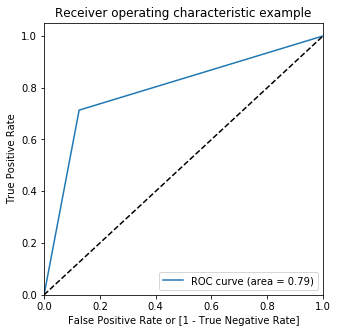

In [259]:
draw_roc(y_train,y_train_pred)

# Let's Check with Hyperparamters 

In [260]:
## We can try range of C: GridSearch
#from sklearn.model_selection import GridSearchCV
param = {'C': [0.0001, 0.001,0.005, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.9, 1], 'penalty': ['l1', 'l2']}
logr = LogisticRegression(class_weight = 'balanced')
model = GridSearchCV(estimator = logr, cv = 5, param_grid = param, scoring = 'recall')
model.fit(X_train, y_train)

C:\Users\Dnyanesh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Dnyanesh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Dnyanesh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Dnyanesh\Anaconda3\lib\si

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.005, 0.01, 0.1, 0.2, 0.3, 0.4,
                               0.5, 0.6, 0.9, 1],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [261]:
model.best_score_

0.7514919011082695

In [262]:
model.best_params_

{'C': 0.6, 'penalty': 'l2'}

# Build model with above best params 

In [263]:
logistic1 = LogisticRegression(C=0.6,penalty='l2',class_weight='balanced')

logistic_model1 = logistic1.fit(X_train,y_train)

y_train_pred1 = logistic_model1.predict(X_train)




In [264]:
print(metrics.accuracy_score(y_train,y_train_pred))

0.8125701459034792


In [265]:
print(metrics.recall_score(y_train,y_train_pred))

0.7134502923976608


## Let's Apply model on Test Data Set

In [266]:
Test_out = pd.read_csv('gender_submission.csv')

In [267]:
Test_out.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [268]:
y_test = Test_out.pop('Survived')

In [269]:
y_test.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

### Code commented as it is not the actual y_test value ..

In [270]:
## Let's apply model on Test DataSet

y_test_pred = logistic1.predict(X_test)

In [271]:
## Print Accuracy score
#print(metrics.accuracy_score(y_test,y_test_pred))

In [272]:
#print(metrics.recall_score(y_test,y_test_pred))

In [273]:
Test_out['Survived'] = y_test_pred

In [274]:
Test_out.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [275]:
Test_out.shape

(418, 2)

In [276]:
from pandas import ExcelWriter

In [277]:
writer = ExcelWriter('Titanic_Out.xls')

In [278]:
Test_out.to_excel(writer,'Sheet1')

In [279]:
writer.save()

In [280]:
y_train.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [281]:
error.head()

NameError: name 'error' is not defined

# Kaggle Score 0.76076

# Build Model with Decision Tree

In [310]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

In [311]:
tree_default_param = DecisionTreeClassifier(class_weight='balanced')

In [312]:
tree_default_param.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [313]:
y_test_tree_pred = tree_default_param.predict(X_test)

In [314]:
print(metrics.classification_report(y_test,y_test_tree_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       266
           1       0.66      0.78      0.71       152

    accuracy                           0.77       418
   macro avg       0.76      0.77      0.76       418
weighted avg       0.79      0.77      0.78       418



## Let's Check model with Different Hyper paramters

### max_depth

In [ ]:
n_folds = 5

param = {'max_depth':range(1,40)}

dtree = DecisionTreeClassifier(class_weight='balanced',random_state=100)

tree = GridSearchCV(dtree,param,cv=n_folds,scoring='accuracy',return_train_score=True)

tree.fit(X_train,y_train)


In [ ]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

In [ ]:
plt.figure()
plt.plot(scores['param_max_depth'],scores['mean_train_score'],label='Train Accuracy')
plt.plot(scores['param_max_depth'],scores['mean_test_score'],label='Test Accuracy')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.legend()
plt.show()


### min_samples_leaf

In [ ]:
n_folds = 5

param = {'min_samples_leaf':range(5,300,10)}

dtree = DecisionTreeClassifier(class_weight='balanced',random_state=100)

tree = GridSearchCV(dtree,param,cv=n_folds,scoring='accuracy',return_train_score=True)

tree.fit(X_train,y_train)

In [ ]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

In [ ]:
plt.figure()
plt.plot(scores['param_min_samples_leaf'],scores['mean_train_score'],label='Train Accuracy')
plt.plot(scores['param_min_samples_leaf'],scores['mean_test_score'],label='Test Accuracy')
plt.xlabel('min_samples_leaf')
plt.ylabel('score')
plt.legend()
plt.show()

### min_samples_split

In [ ]:
n_folds = 5

param = {'min_samples_split':range(5,300,10)}

dtree = DecisionTreeClassifier(class_weight='balanced',random_state=100)

tree = GridSearchCV(dtree,param,cv=n_folds,scoring='accuracy',return_train_score=True)

tree.fit(X_train,y_train)

In [ ]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

In [ ]:
plt.figure()
plt.plot(scores['param_min_samples_split'],scores['mean_train_score'],label='Train Accuracy')
plt.plot(scores['param_min_samples_split'],scores['mean_test_score'],label='Test Accuracy')
plt.xlabel('min_samples_leaf')
plt.ylabel('score')
plt.legend()
plt.show()

### Grid Search to Find Optimal Hyperparameters

In [ ]:
n_folds = 5

param = {'max_depth':range(1,40),
         'min_samples_leaf':range(5,300,10),
         'min_samples_split':range(5,300,10),
         'criterion': ["entropy", "gini"]
        }

dtree = DecisionTreeClassifier(class_weight='balanced',random_state=100)

tree = GridSearchCV(dtree,param,cv=n_folds,scoring='accuracy',return_train_score=True)

tree.fit(X_train,y_train)

In [ ]:
# cv results
cv_results = pd.DataFrame(tree.cv_results_)
cv_results

In [ ]:
tree.best_score_

In [ ]:
tree.best_params_

In [ ]:
### Let's build model with above Best param

dtree = DecisionTreeClassifier(class_weight='balanced',criterion='gini',max_depth=4,min_samples_leaf=5,min_samples_split=5)

dtree.fit(X_train,y_train)

In [ ]:
## Train Score
y_train_pred_tree = dtree.predict(X_train)


In [ ]:
y_train_pred_tree

In [ ]:
print(metrics.classification_report(y_train,y_train_pred_tree))

In [ ]:
y_test_pred_tree = dtree.predict(X_test)

In [ ]:
Tree_out = pd.read_csv('gender_submission.csv')

In [ ]:
Tree_out.drop('Survived',axis=1,inplace=True)

In [ ]:
Tree_out['Survived'] = y_test_pred_tree

In [ ]:
writer = ExcelWriter('Titanic_Tree_out.xls')
Tree_out.to_excel(writer,'Sheet1')
writer.save()

# Kaggle Score : 0.75598

 # Support Vector Machine

In [282]:
X_train[:1]

array([[ 0.73769513, -0.58206189, -0.50244517, -0.51015154,  0.90258736,
         1.80642129, -0.18012484, -0.13522468, -0.14359163, -0.07512217,
        -0.08898625, -0.30756234,  0.61583843,  0.56049915, -0.39070706,
        -0.31407587, -0.07512217, -0.06715343, -0.07512217, -0.03352008]])

In [284]:
y_train[:1]

0    0
Name: Survived, dtype: int64

In [285]:
from sklearn.svm import SVC
from sklearn import metrics 
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
#import warning
#warning.filterwarning('ignore')

In [286]:
svm_model = SVC(C=0.5)
svm_model = svm_model.fit(X_train,y_train)

In [287]:
y_train_svm_pred = svm_model.predict(X_train)

In [288]:
svm_cm = metrics.confusion_matrix(y_train,y_train_svm_pred)

In [289]:
print(svm_cm)

TP = svm_cm[1,1] # True Positive 
TN = svm_cm[0,0] # True Negative
FP = svm_cm[0,1] # False positive
FN = svm_cm[1,0] # False Negative

[[491  58]
 [ 97 245]]


In [290]:
## Sensitivity
print(metrics.recall_score(y_train,y_train_svm_pred))

0.716374269005848


In [291]:
#sensitivity 
TP / ( TP + FN)

0.716374269005848

In [292]:
## Spcificity Score 
TN / ( TN + FP )

0.8943533697632058

In [293]:
## Accuracy Score
print(metrics.accuracy_score(y_train,y_train_svm_pred))

0.8260381593714927


## K-Fold Cross Validation

In [294]:
help(KFold)

Help on class KFold in module sklearn.model_selection._split:

class KFold(_BaseKFold)
 |  KFold(n_splits=5, shuffle=False, random_state=None)
 |  
 |  K-Folds cross-validator
 |  
 |  Provides train/test indices to split data in train/test sets. Split
 |  dataset into k consecutive folds (without shuffling by default).
 |  
 |  Each fold is then used once as a validation while the k - 1 remaining
 |  folds form the training set.
 |  
 |  Read more in the :ref:`User Guide <cross_validation>`.
 |  
 |  Parameters
 |  ----------
 |  n_splits : int, default=5
 |      Number of folds. Must be at least 2.
 |  
 |      .. versionchanged:: 0.22
 |          ``n_splits`` default value changed from 3 to 5.
 |  
 |  shuffle : boolean, optional
 |      Whether to shuffle the data before splitting into batches.
 |  
 |  random_state : int, RandomState instance or None, optional, default=None
 |      If int, random_state is the seed used by the random number generator;
 |      If RandomState instanc

In [295]:
# Creating no. of K folds
fold = KFold(n_splits=5,shuffle=True,random_state=100)
svm_model1 = SVC(C=1)

In [296]:
help(cross_val_score)

Help on function cross_val_score in module sklearn.model_selection._validation:

cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
    Evaluate a score by cross-validation
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : array-like
        The data to fit. Can be for example a list, or an array.
    
    y : array-like, optional, default: None
        The target variable to try to predict in the case of
        supervised learning.
    
    groups : array-like, with shape (n_samples,), optional
        Group labels for the samples used while splitting the dataset into
        train/test set. Only used in conjunction with a "Group" :term:`cv`
        instance (e.g., :class:`GroupKFold`).
    
    scoring : string, callable or 

In [297]:
# Let's compute cross validation score
cv = cross_val_score(estimator=svm_model1,X=X_train,y=y_train,cv=fold,scoring='accuracy')


In [298]:
## Let's print the accuracy of five folds
cv

array([0.81564246, 0.74157303, 0.82022472, 0.83707865, 0.80337079])

In [299]:
# Average Accuracy
cv.mean()

0.803577929822359

In [300]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, scoring=None, n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either esti

In [301]:
## Let's apply Grid Search to find the optimal hyper paramter

params = {"C":[0.001,0.01,0.1,0.5,1,1.5,2,2.5,5]}
svm_model2 = SVC()


grid_search = GridSearchCV(estimator=svm_model2,param_grid=params,scoring='accuracy',cv=fold,return_train_score=True)

In [302]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2, 2.5, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [303]:
## Store all cross validation results
grid_search.cv_results_

{'mean_fit_time': array([0.03748388, 0.0312511 , 0.02186451, 0.02499456, 0.02499714,
        0.02499309, 0.03437042, 0.03436818, 0.03749471]),
 'std_fit_time': array([7.66022775e-03, 1.56534825e-05, 7.64239899e-03, 7.66668597e-03,
        7.64910802e-03, 7.65173551e-03, 1.16847322e-02, 6.24852228e-03,
        7.65158105e-03]),
 'mean_score_time': array([0.01249733, 0.00312424, 0.00937195, 0.00624876, 0.00312233,
        0.00312452, 0.00937266, 0.00624828, 0.00937219]),
 'std_score_time': array([0.00624867, 0.00624847, 0.00765216, 0.00765314, 0.00624466,
        0.00624905, 0.00765275, 0.00765255, 0.00765236]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 0.5, 1, 1.5, 2, 2.5, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 0.5},
  {'C': 1},
  {'C': 1.5},
  {'C': 2},
  {'C': 2.5},
  {'C': 5}],
 'split0_test_scor

In [304]:
grid_search_result = pd.DataFrame(grid_search.cv_results_)
grid_search_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.037484,0.007660,0.012497,0.006249,0.001,{'C': 0.001},0.581006,0.561798,0.612360,0.679775,...,0.616201,0.042771,8,0.625000,0.629734,0.617111,0.600281,0.608696,0.616164,0.010688
1,0.031251,0.000016,0.003124,0.006248,0.01,{'C': 0.01},0.581006,0.561798,0.612360,0.679775,...,0.616201,0.042771,8,0.625000,0.629734,0.617111,0.600281,0.608696,0.616164,0.010688
2,0.021865,0.007642,0.009372,0.007652,0.1,{'C': 0.1},0.804469,0.741573,0.814607,0.825843,...,0.796849,0.029224,7,0.804775,0.817672,0.800842,0.792426,0.800842,0.803311,0.008235
3,0.024995,0.007667,0.006249,0.007653,0.5,{'C': 0.5},0.815642,0.747191,0.814607,0.831461,...,0.804702,0.029460,3,0.831461,0.828892,0.824684,0.813464,0.828892,0.825479,0.006388
4,0.024997,0.007649,0.003122,0.006245,1,{'C': 1},0.815642,0.741573,0.820225,0.837079,...,0.803578,0.032832,4,0.837079,0.841515,0.831697,0.817672,0.840112,0.833615,0.008654


In [305]:
grid_search_result.shape

(9, 21)

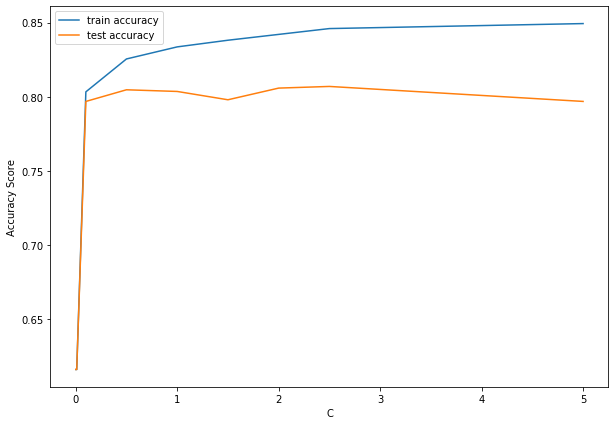

In [306]:
## Let's plot C verses Train and Test Score

plt.figure(figsize=(10,7))
plt.plot(grid_search_result['param_C'],grid_search_result['mean_train_score'])
plt.plot(grid_search_result['param_C'],grid_search_result['mean_test_score'])
plt.xlabel('C')
plt.ylabel('Accuracy Score')
plt.legend(['train accuracy', 'test accuracy'], loc='upper left')
plt.show()



In [307]:
## Let's print Model Score and Best params

print(grid_search.best_score_)
print(grid_search.best_params_['C'])

0.8069549934090766
2.5


In [308]:
## Let's build the Model with above Best Params

svm_best_param_model = SVC(C=2.5)

svm_best_param_model.fit(X_train,y_train)

y_svm_best_train = svm_best_param_model.predict(X_train)

# sensitivity
print('Sensitivity',metrics.recall_score(y_train,y_svm_best_train))

# accuracy
print('Accuracy',metrics.accuracy_score(y_train,y_svm_best_train))


Sensitivity 0.6754385964912281
Accuracy 0.8417508417508418


In [309]:
### Let's apply on Test Set

y_test_pred_svm = svm_best_param_model.predict(X_test)
svm_out = pd.read_csv('gender_submission.csv')
svm_out.drop('Survived',axis=1,inplace=True)
svm_out['Survived'] = y_test_pred_svm

writer = ExcelWriter('Titanic_SVM_out.xls')
svm_out.to_excel(writer,'Sheet1')
writer.save()



# Kaggle Score : 0.78947

 # Adaboost

In [317]:
## Importing all required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [319]:
## let's build base model and check the accuracy
tree_model = DecisionTreeClassifier(class_weight='balanced',max_depth=2)

tree_model.fit(X_train,y_train)

y_train_tree_base = tree_model.predict(X_train)

print(metrics.classification_report(y_train,y_train_tree_base))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       549
           1       0.74      0.68      0.71       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.78      0.79      0.78       891



In [320]:
help(AdaBoostClassifier)

Help on class AdaBoostClassifier in module sklearn.ensemble._weight_boosting:

class AdaBoostClassifier(sklearn.base.ClassifierMixin, BaseWeightBoosting)
 |  AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
 |  
 |  An AdaBoost classifier.
 |  
 |  An AdaBoost [1] classifier is a meta-estimator that begins by fitting a
 |  classifier on the original dataset and then fits additional copies of the
 |  classifier on the same dataset but where the weights of incorrectly
 |  classified instances are adjusted such that subsequent classifiers focus
 |  more on difficult cases.
 |  
 |  This class implements the algorithm known as AdaBoost-SAMME [2].
 |  
 |  Read more in the :ref:`User Guide <adaboost>`.
 |  
 |  .. versionadded:: 0.14
 |  
 |  Parameters
 |  ----------
 |  base_estimator : object, optional (default=None)
 |      The base estimator from which the boosted ensemble is built.
 |      Support for sample weighting 

In [323]:
## All the paramters with default values 
tree = DecisionTreeClassifier(class_weight='balanced',max_depth=2)
adaboost_model1 = AdaBoostClassifier(base_estimator=tree,n_estimators=50,learning_rate=1.0,algorithm="SAMME")

In [324]:
adaboost_model1.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                      

In [325]:
## Let's predict using above model
adaboost_predict_train = adaboost_model1.predict(X_train)

In [326]:
# Printing first 5 
adaboost_predict_train[:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [327]:
# Let's check the Classification Report

print(metrics.classification_report(y_train,adaboost_predict_train))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       549
           1       0.74      0.68      0.71       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.78      0.79      0.78       891

